tensorflow

In [ ]:
!pip install tensorflow

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.2821 - loss: 1.7040 - val_accuracy: 0.7667 - val_loss: 1.0093 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5198 - loss: 1.1195 - val_accuracy: 0.8000 - val_loss: 0.9269 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6140 - loss: 0.8083 - val_accuracy: 0.8000 - val_loss: 0.8570 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6762 - loss: 0.7072 - val_accuracy: 0.8000 - val_loss: 0.7973 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8235 - loss: 0.4560 - val_accuracy: 0.8000 - val_loss: 0.7481 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8279 - loss: 0.3823 - val_accuracy: 0.8000 - val_loss: 0.7070 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8562 - loss: 0.3539 - val_accuracy: 

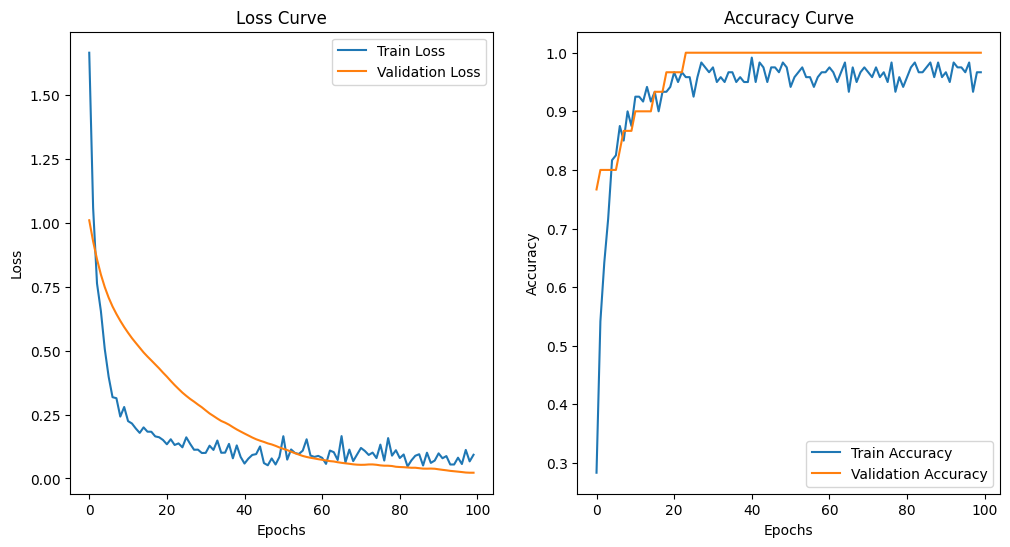

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 載入 Iris 資料集
data = load_iris()
X = data.data
y = data.target

# 將目標變數轉換為 one-hot 編碼
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = tf.keras.utils.to_categorical(y, 3)

# 資料標準化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 拆分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立神經網絡模型
model = Sequential()

# 輸入層 + 隱藏層 1
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())  # 加入 Batch Normalization
model.add(Dropout(0.3))  # 加入 Dropout

# 隱藏層 2
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  # 加入 Batch Normalization
model.add(Dropout(0.3))  # 加入 Dropout

# 輸出層
model.add(Dense(3, activation='softmax'))  # 用 softmax 激活函數進行多類別分類

# 編譯模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 設置回調函數
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

# 訓練模型
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# 繪製訓練過程中的損失和準確度曲線
def plot_history(history):
    # 訓練與驗證損失
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 訓練與驗證準確度
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 呼叫繪圖函數
plot_history(history)


PyTorch

In [ ]:
!pip install torch torchvision

Epoch [1/100], Train Loss: 1.1464, Train Accuracy: 29.17%, Val Loss: 1.0778, Val Accuracy: 60.00%
Epoch [2/100], Train Loss: 0.9338, Train Accuracy: 57.50%, Val Loss: 0.9899, Val Accuracy: 66.67%
Epoch [3/100], Train Loss: 0.7959, Train Accuracy: 75.00%, Val Loss: 0.8795, Val Accuracy: 93.33%
Epoch [4/100], Train Loss: 0.6831, Train Accuracy: 80.00%, Val Loss: 0.7630, Val Accuracy: 86.67%
Epoch [5/100], Train Loss: 0.6390, Train Accuracy: 81.67%, Val Loss: 0.6534, Val Accuracy: 86.67%
Epoch [6/100], Train Loss: 0.5424, Train Accuracy: 87.50%, Val Loss: 0.5635, Val Accuracy: 86.67%
Epoch [7/100], Train Loss: 0.4982, Train Accuracy: 90.00%, Val Loss: 0.4873, Val Accuracy: 86.67%
Epoch [8/100], Train Loss: 0.4511, Train Accuracy: 89.17%, Val Loss: 0.4328, Val Accuracy: 90.00%
Epoch [9/100], Train Loss: 0.4284, Train Accuracy: 90.83%, Val Loss: 0.3891, Val Accuracy: 90.00%
Epoch [10/100], Train Loss: 0.4173, Train Accuracy: 89.17%, Val Loss: 0.3491, Val Accuracy: 90.00%
Epoch [11/100], Tra

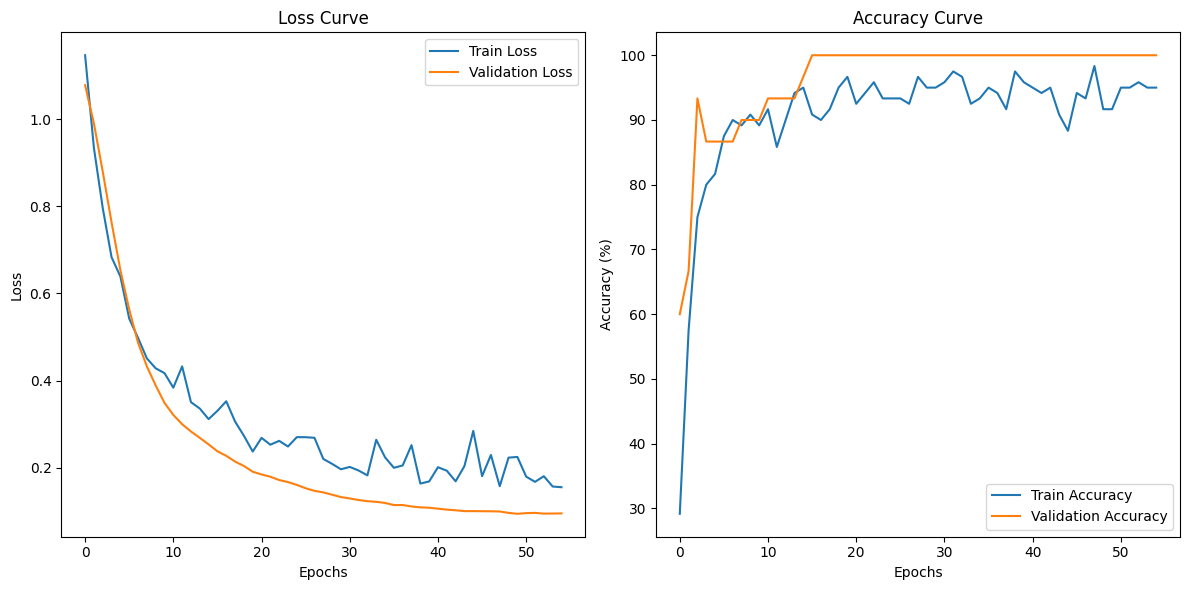

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

# 載入 Iris 資料集
data = load_iris()
X = data.data
y = data.target

# 將目標變數轉換為 PyTorch 張量
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = torch.tensor(y, dtype=torch.long)

# 資料標準化
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = torch.tensor(X, dtype=torch.float32)

# 拆分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 PyTorch 的 DataLoader
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

# 定義神經網絡模型
class IrisNN(nn.Module):
    def __init__(self):
        super(IrisNN, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.bn1 = nn.BatchNorm1d(64)  # Batch Normalization
        self.dropout = nn.Dropout(0.3)  # Dropout
        self.fc2 = nn.Linear(64, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 3)  # 3 類別

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return x

# 初始化模型
model = IrisNN()

# 損失函數和優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# EarlyStopping 條件設置
early_stopping_patience = 5
best_val_loss = float('inf')
epochs_without_improvement = 0

# 設定 Learning Rate Scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)

# 訓練過程
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(100):  # 最大訓練 100 次
    model.train()  # 訓練模式
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # 向前傳播
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # 向後傳播
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # 計算訓練準確度
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # 驗證過程
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(test_loader)
    val_accuracy = 100 * correct / total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    # 顯示進度
    print(f"Epoch [{epoch+1}/100], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

    # EarlyStopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping")
            break

    # 更新學習率
    scheduler.step()

# 繪製訓練和驗證損失與準確度曲線
plt.figure(figsize=(12, 6))

# 損失曲線
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 準確度曲線
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


PyTorch Lightning

In [ ]:
!pip install pytorch-lightning matplotlib scikit-learn

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type        | Params | Mode 
------------------------------------------------
0 | fc1     | Linear      | 320    | train
1 | bn1     | BatchNorm1d | 128    | train
2 | dropout | Dropout     | 0      | train
3 | fc2     | Linear      | 4.2 K  | train
4 | bn2     | BatchNorm1d | 128    | train
5 | fc3     | Linear      | 195    | train
------------------------------------------------
4.9 K     Trainable params
0         Non-trainable params
4.9 K     Total params
0.020     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

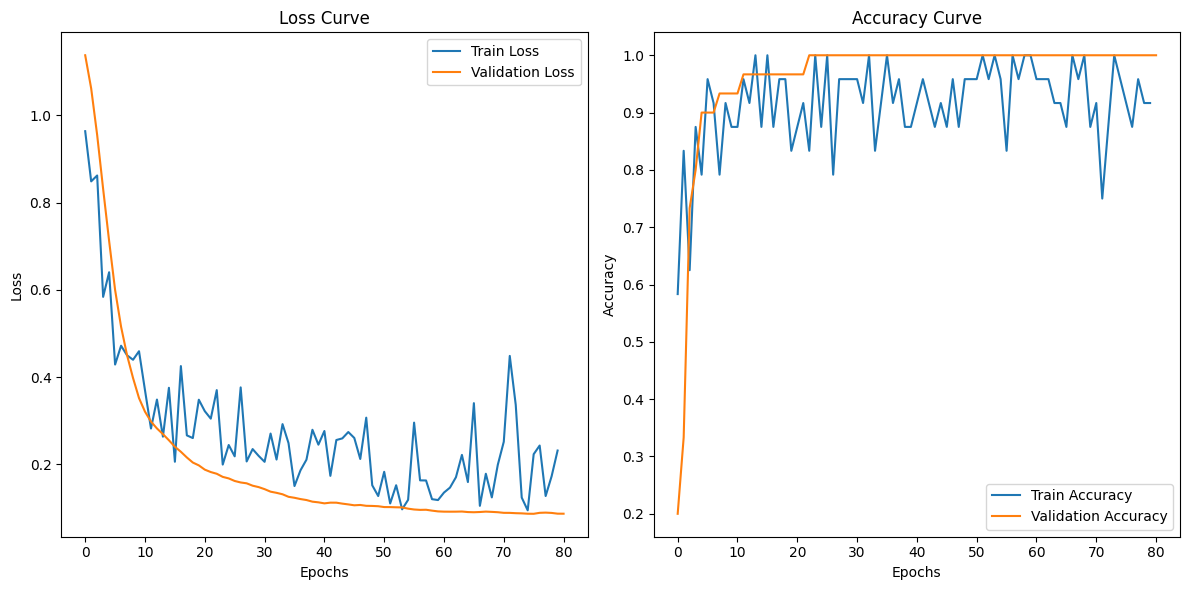

In [ ]:
import torch
import pytorch_lightning as pl
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. 載入並處理資料
data = load_iris()
X = data.data
y = data.target

# 資料標準化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 轉換成 PyTorch Tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# 拆分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 DataLoader
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

# 2. 定義 PyTorch Lightning 模型
class IrisModel(pl.LightningModule):
    def __init__(self, input_size=4, num_classes=3):
        super(IrisModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return x

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self.forward(inputs)
        loss = F.cross_entropy(outputs, targets)
        acc = (outputs.argmax(dim=1) == targets).float().mean()
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_acc', acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self.forward(inputs)
        loss = F.cross_entropy(outputs, targets)
        acc = (outputs.argmax(dim=1) == targets).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        return {"val_loss": loss, "val_acc": acc}

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)
        return {"optimizer": optimizer, "lr_scheduler": scheduler}

# 3. 自定義 Callback 用於記錄數據
class MetricsLogger(pl.Callback):
    def __init__(self):
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []

    def on_train_epoch_end(self, trainer, pl_module):
        self.train_losses.append(trainer.callback_metrics["train_loss"].item())
        self.train_accuracies.append(trainer.callback_metrics["train_acc"].item())

    def on_validation_epoch_end(self, trainer, pl_module):
        self.val_losses.append(trainer.callback_metrics["val_loss"].item())
        self.val_accuracies.append(trainer.callback_metrics["val_acc"].item())

# 4. 設置訓練器
metrics_logger = MetricsLogger()
trainer = pl.Trainer(
    max_epochs=100,
    callbacks=[
        metrics_logger,
        pl.callbacks.EarlyStopping(monitor="val_loss", patience=5),
    ],
    log_every_n_steps=1,
    accelerator="auto",
)

# 5. 訓練模型
model = IrisModel()
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)

# 6. 繪製訓練與驗證曲線
plt.figure(figsize=(12, 6))

# 損失曲線
plt.subplot(1, 2, 1)
plt.plot(metrics_logger.train_losses, label="Train Loss")
plt.plot(metrics_logger.val_losses, label="Validation Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 準確度曲線
plt.subplot(1, 2, 2)
plt.plot(metrics_logger.train_accuracies, label="Train Accuracy")
plt.plot(metrics_logger.val_accuracies, label="Validation Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
